In [1]:
import numpy as np
import matplotlib.pyplot as plt
import flashy
from flashy.io import Progenitor, DatFile, TimeSeries1D

%matplotlib inline

# Progenitor file

In [2]:
model = Progenitor.load('s20.0.1d')
print(model)
print(model.field_list)

Progenitor @ s20.0.1d; s20.0 from Woosley & Heger 2002 (16 Isotopes); 27 fields, 1265 cells
['r', 'mass', 'dens', 'temp', 'pres', 'velx', 'ye', 'sumy', 'neut', 'h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'ne20', 'mg24', 'si28', 's32', 'ar36', 'ca40', 'ti44', 'cr48', 'fe52', 'fe54', 'fe56', 'ni56']


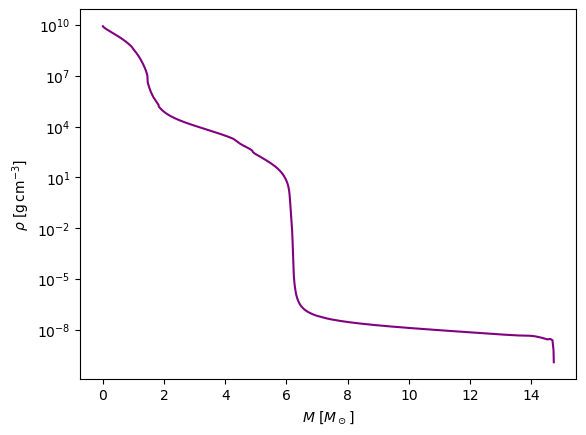

In [3]:
Msun = 1.989e33
xvar = 'mass'
yvar = 'dens'
plt.plot(model[xvar]/Msun, model[yvar], c='purple')
plt.xscale(flashy.get_plot_scale(xvar))
plt.yscale(flashy.get_plot_scale(yvar))
plt.xlabel(flashy.get_label(xvar, units='sun'))
plt.ylabel(flashy.get_label(yvar))
plt.show()

mesa_model = Progenitor.load('s20.data', parser='mesa')
if mesa_model:
    mesa_model.save('s20_mesa.1d')

# Dat File

In [4]:
dat_file = DatFile.load('s20.dat')
print(dat_file)
print(dat_file.field_list)

DatFile @ s20.dat; 1 runs; 63 fields;
['time', 'mass', 'x-momentum', 'y-momentum', 'z-momentum', 'E_total', 'E_kinetic', 'E_internal', 'E_grav', 'explosion energy', 'E_bind,gain', 'mean shock radius', 'min shock radius', 'mass accretion rate', 'max shock radius', 'magnetic energy', 'central density', 'net heating rate, gain', 'mass in gain region', 'avg entropy in gain', 'neutron star mass', 'pns rotation period', 'pns-x', 'pns-y', 'pns-z', 'com-x', 'com-y', 'com-z', 'average radius of PNS', 'correct PNS radius', 'E_kinetic, theta, gain', 'E_kinetic, phi, gain', 'max(c_s^/v_esc^2)', 'M1 lum tot nue', 'M1 lum tot anue', 'M1 lum tot nux', 'M1 aveE nue', 'M1 aveE anue', 'M1 aveE nux', 'M1 rmsE nue', 'M1 rmsE anue', 'M1 rmsE nux', 'R_nue', 'R_anue', 'R_nux', 'ddI xx r<50km', 'ddI yx=xy r<50km', 'ddI yy r<50km', 'ddI zx=xz r<50km', 'ddI zy=yz r<50km', 'ddI zz r<50km', 'ddI xx 50<r<150', 'ddI yx=xy 50<r<150', 'ddI yy 50<r<150', 'ddI zx=xz 50<r<150', 'ddI zy=yz 50<r<150', 'ddI zz 50<r<150', '

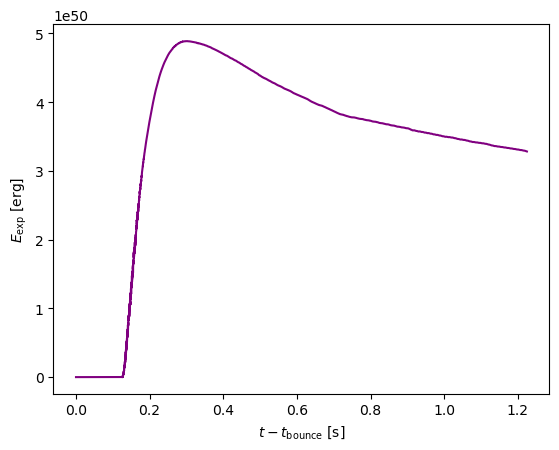

In [5]:
t_bounce = flashy.get_bounce_time('s20.log')
# Get run from dat file
# Only keep post bounce data
dat = dat_file[0][t_bounce:]
var = 'explosion energy' # could also be accessed with 'eexp' or the column number, which should be 9 (because of 0-indexing in python)
plt.plot(dat['time'] - t_bounce, dat[var], c='purple')
plt.yscale(flashy.get_plot_scale(var))
plt.xlabel(flashy.get_label('time post bounce'))
plt.ylabel(flashy.get_label(var))
plt.show()

# Time Series 1D

In [6]:
# series = TimeSeries1D.load('path/to/output/dir')
# series = TimeSeries1D.load(list_of_plt_files_path)
# Use saved time series
series = TimeSeries1D.load('s20.h5')
print(series)
print(series.field_list)

# Make interpolated time series from AMR data
r = np.logspace(6, 9, 200)
uni_series = series.interp(r)
print(uni_series)

AMRTimeSeries1D @ s20.h5; 1419 times (0.0000-1.4180 [s])
['dens', 'deps', 'eint', 'ener', 'entr', 'gamc', 'gpot', 'pres', 'sumy', 'temp', 'velx', 'ye']
UniformTimeSeries1D @ s20.h5; 1419 times (0.0000-1.4180 [s])


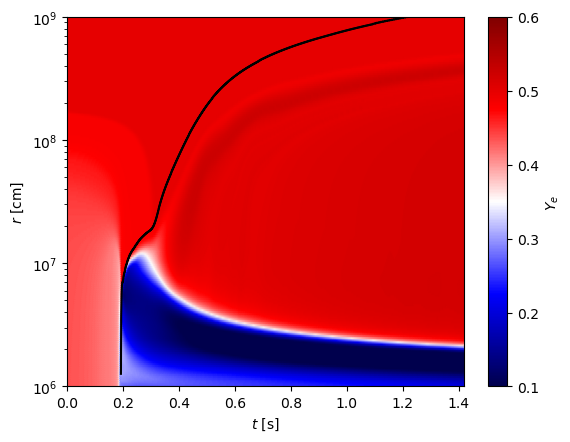

In [13]:
pm = plt.pcolormesh(uni_series['t'], uni_series['r'], uni_series['ye'].as_array(),
                    cmap='seismic', shading='gouraud', vmin=0.1, vmax=0.6)

plt.plot(dat['time'], dat['max shock radius'], c='k')
cbar = plt.colorbar()
cbar.set_label(flashy.get_label('ye'))

plt.ylim(1e6, 1e9)
plt.xscale(flashy.get_plot_scale('t'))
plt.yscale(flashy.get_plot_scale('r'))
plt.xlabel(flashy.get_label('t'))
plt.ylabel(flashy.get_label('r'))
plt.show()